# **DECISION TREE IMPLEMENTATION**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for encoding
from sklearn.preprocessing import LabelEncoder

#for train test splitting
from sklearn.model_selection import train_test_split

#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

#for visualizing tree 
from sklearn.tree import plot_tree
dataset = pd.read_csv( "results.csv.zip") 
dataset

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
43183,2022-02-01,Suriname,Guyana,2,1,Friendly,Paramaribo,Suriname,False
43184,2022-02-02,Burkina Faso,Senegal,1,3,African Cup of Nations,Yaoundé,Cameroon,True
43185,2022-02-03,Cameroon,Egypt,0,0,African Cup of Nations,Yaoundé,Cameroon,False
43186,2022-02-05,Cameroon,Burkina Faso,3,3,African Cup of Nations,Yaoundé,Cameroon,False


In [ ]:
# preprocessing the daataset to make all entries in the form of numbers.
from sklearn.preprocessing import LabelEncoder
labelencoder_dataset = LabelEncoder() 
data =dataset. apply(LabelEncoder().fit_transform)
data

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,0,234,81,0,0,66,634,204,0
1,1,80,230,4,2,66,992,68,0
2,2,234,81,2,1,66,634,204,0
3,3,80,230,2,2,66,992,68,0
4,4,234,81,3,0,66,634,204,0
...,...,...,...,...,...,...,...,...,...
43183,15416,255,114,2,1,66,1308,224,0
43184,15417,40,231,1,3,7,1921,38,1
43185,15418,43,78,0,0,7,1921,38,0
43186,15419,43,41,3,3,7,1921,38,0


In [ ]:
x = data.iloc[:,:-1]
x

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,0,234,81,0,0,66,634,204
1,1,80,230,4,2,66,992,68
2,2,234,81,2,1,66,634,204
3,3,80,230,2,2,66,992,68
4,4,234,81,3,0,66,634,204
...,...,...,...,...,...,...,...,...
43183,15416,255,114,2,1,66,1308,224
43184,15417,40,231,1,3,7,1921,38
43185,15418,43,78,0,0,7,1921,38
43186,15419,43,41,3,3,7,1921,38


In [ ]:
Y = data.iloc[:,8] 
Y

0        0
1        0
2        0
3        0
4        0
        ..
43183    0
43184    1
43185    0
43186    0
43187    1
Name: neutral, Length: 43188, dtype: int64

In [ ]:
x_train,x_valid, y_train, y_valid = train_test_split(x,Y,random_state=1,stratify=Y, test_size=0.25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Distribution in training set
y_train.value_counts(normalize=True)

0    0.752092
1    0.247908
Name: neutral, dtype: float64

In [ ]:
#Distribution in validation set
y_valid.value_counts(normalize=True)

0    0.752061
1    0.247939
Name: neutral, dtype: float64

In [ ]:
#Shape of a training set
x_train.shape, y_train.shape

((32391, 8), (32391,))

In [ ]:
#Shape of validation set
x_valid.shape, y_valid.shape

((10797, 8), (10797,))

In [ ]:
#Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#How to import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
#Creating the decision tree function
dt_learn=DecisionTreeClassifier(random_state=0)

In [ ]:
#Fitting the model
dt_learn.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
#Checking the training score
dt_learn.score(x_train, y_train)

1.0

In [ ]:
#Checking the validation score
dt_learn.score(x_valid, y_valid)

0.9349819394276188

In [ ]:
#Predictions on validation set
dt_learn.predict(x_valid)

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
dt_learn.predict_proba(x_valid)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
y_pred=dt_learn.predict_proba(x_valid)[:,1]

In [ ]:
new_y=[]
for i in range(len(y_pred)):
    if y_pred[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_valid, new_y)

0.9349819394276188

In [ ]:
#Changing the max_depth
train_accuracy=[]
validation_accuracy=[]
for depth in range(1,12):
    dt_learn=DecisionTreeClassifier(max_depth=depth,random_state=0)
    dt_learn.fit(x_train,y_train)
    train_accuracy.append(dt_learn.score(x_train,y_train))
    validation_accuracy.append(dt_learn.score(x_valid,y_valid))

In [ ]:
frame=pd.DataFrame({'max_depth':range(1,12), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.752092,0.752061
1,2,0.775431,0.771140
2,3,0.807014,0.800778
3,4,0.835386,0.829119
4,5,0.844000,0.836251


No handles with labels found to put in legend.


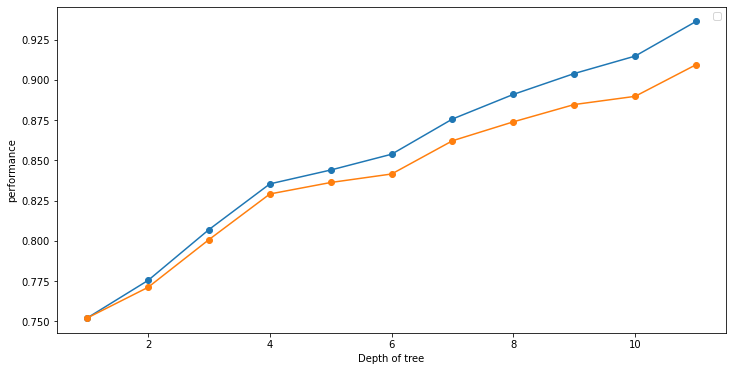

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [ ]:
dt_learn=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=25, random_state=0)

In [ ]:
#Fitting the model
dt_learn.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=0)

In [ ]:
#Training score
dt_learn.score(x_train, y_train)

0.8494643573832238

In [ ]:
#validation score
dt_learn.score(x_valid, y_valid)

0.8405112531258683

In [ ]:
from sklearn import tree

In [ ]:
decision_tree=tree.export_graphviz(dt_learn,out_file='tree.dot',feature_names=x_train.columns,max_depth=12,filled=True)

In [ ]:
!dot -Tpng tree.dot -o tree.png

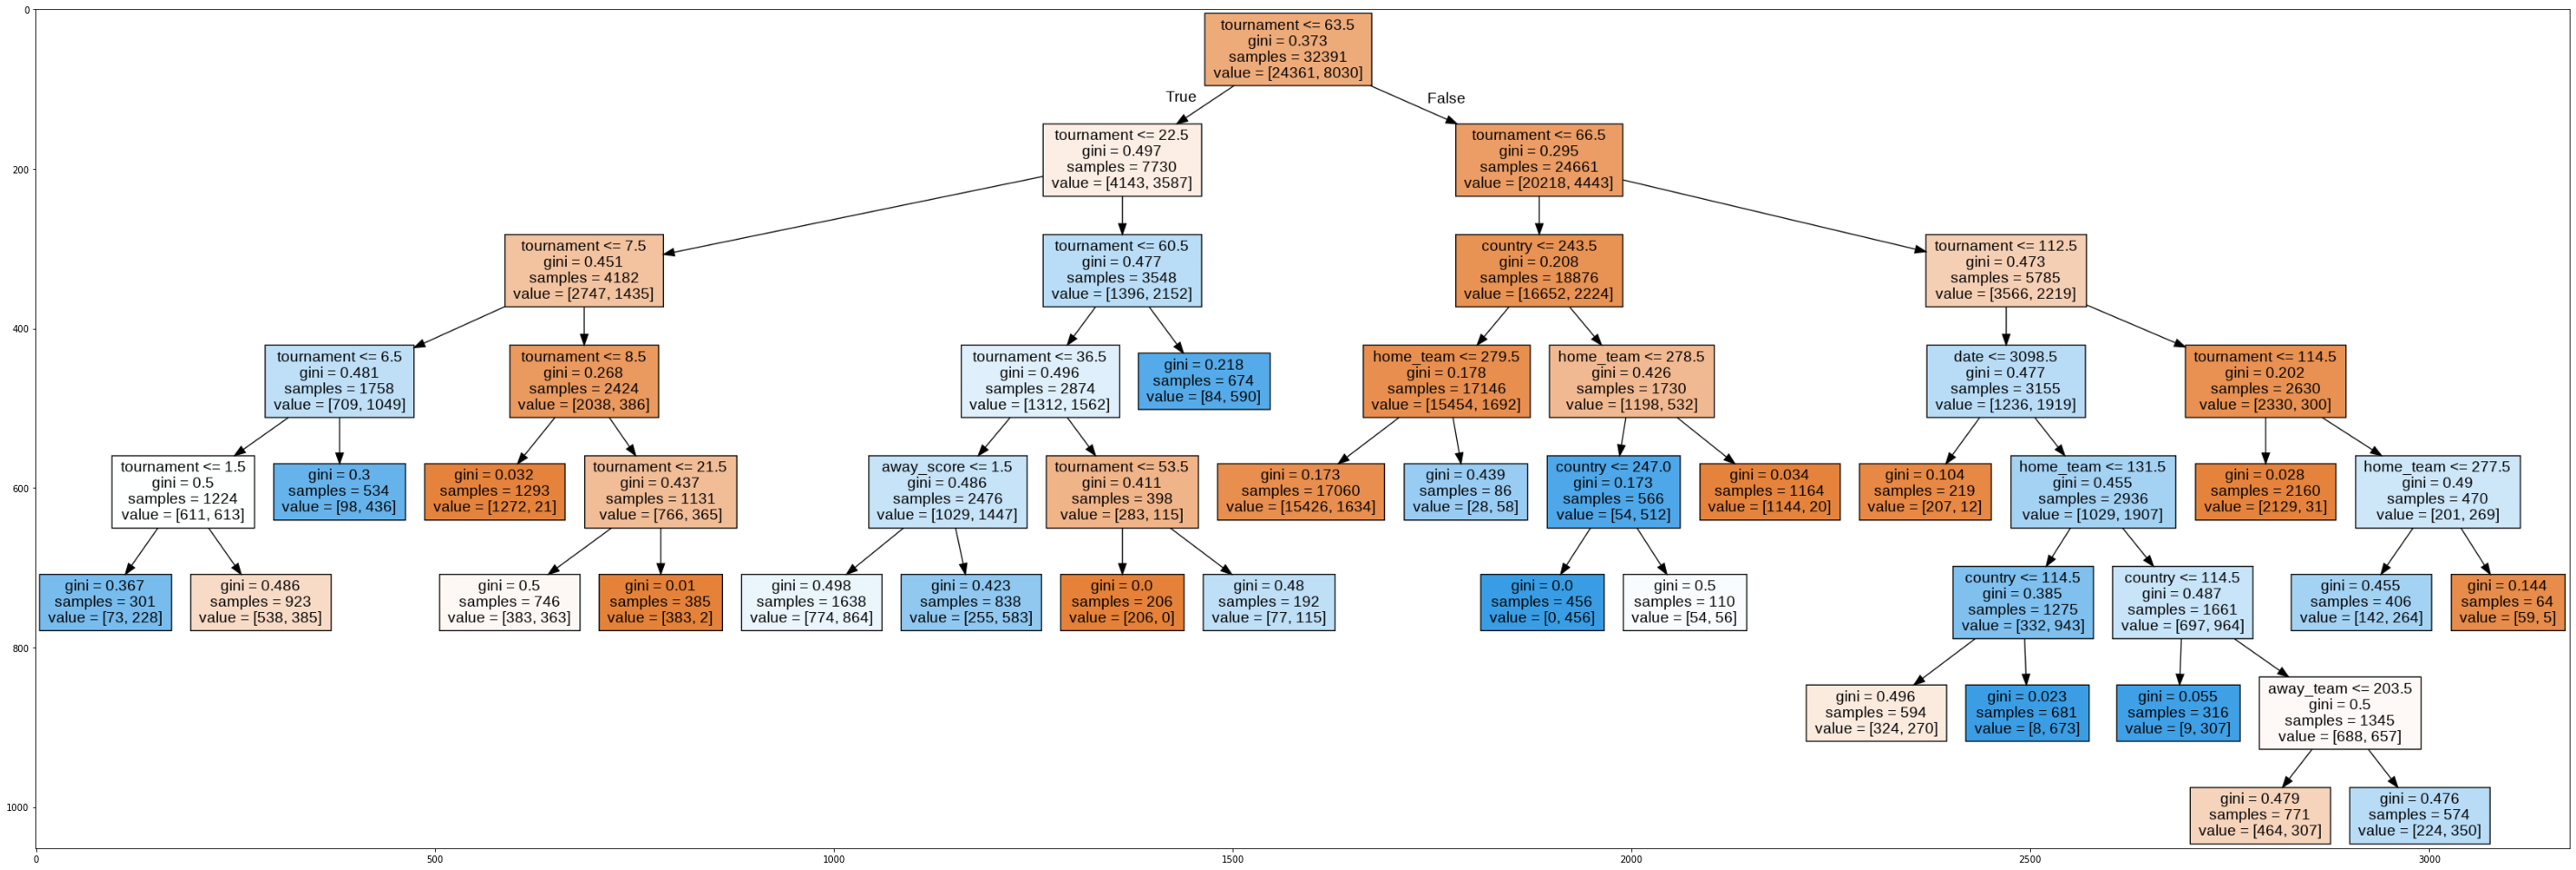

In [ ]:
image = plt.imread('tree.png')
plt.figure(figsize=(50,50))
plt.imshow(image)